In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [2]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read the CSV files
d1 = pd.read_csv("C:/Users/HP/Downloads/student/student-mat.csv", sep=";")
d2 = pd.read_csv("C:/Users/HP/Downloads/student/student-por.csv", sep=";")


# Merge the dataframes on specified columns
# merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
df = pd.concat([d1,d2])

# Print the number of rows in the merged dataframe
print(len(df))


1044


In [5]:
# size of the data:
df.size

34452

In [6]:
# Assuming 'merged_data.csv' as the desired file name
csv_file_name = 'merged_studentdata.csv'

# Save the merged DataFrame to a CSV file
df.to_csv(csv_file_name, index=False)

# Print a message indicating that the CSV file has been saved
print(f"The merged DataFrame has been saved to {csv_file_name}")


The merged DataFrame has been saved to merged_studentdata.csv


In [7]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [8]:
# size of data
print(f"The total number of the rows is {df.shape[0]}")
print(f"The total number of the columns is {df.shape[1]}")

The total number of the rows is 1044
The total number of the columns is 33


In [9]:
# checking the data types of the columns
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
# check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


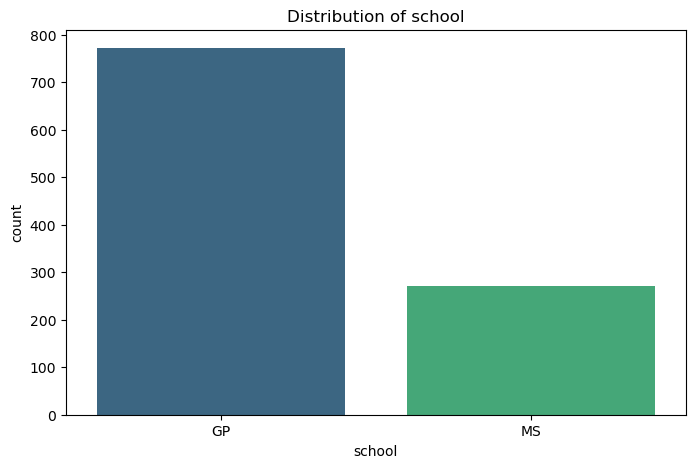

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


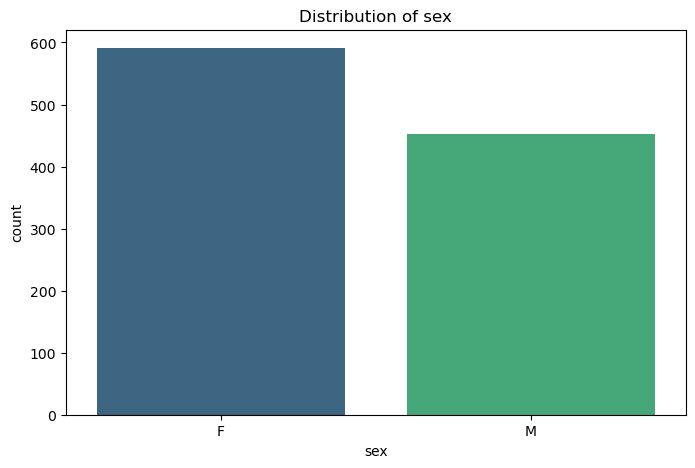

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


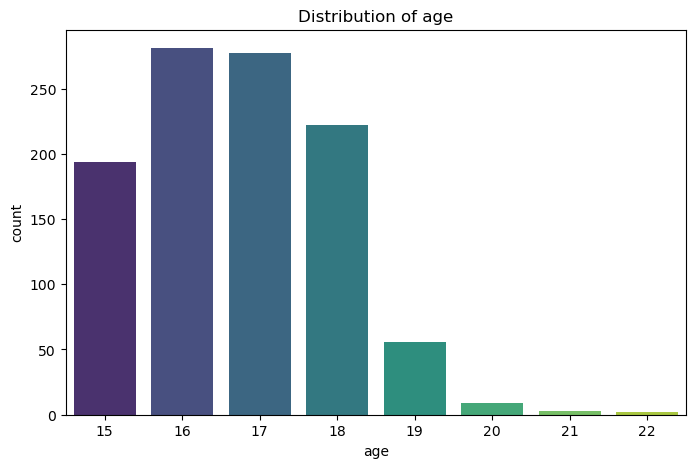

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


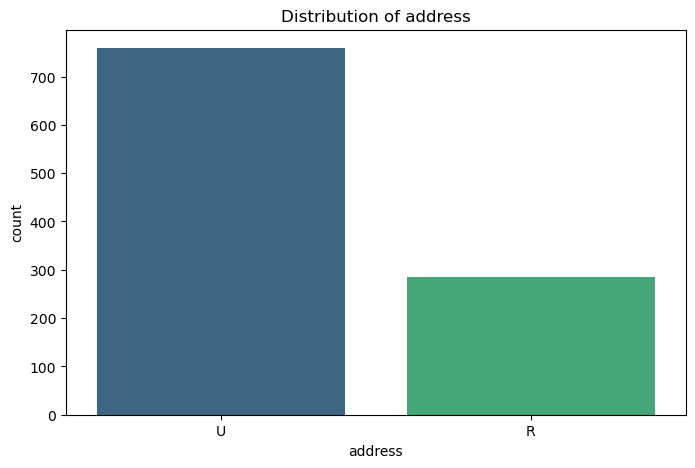

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


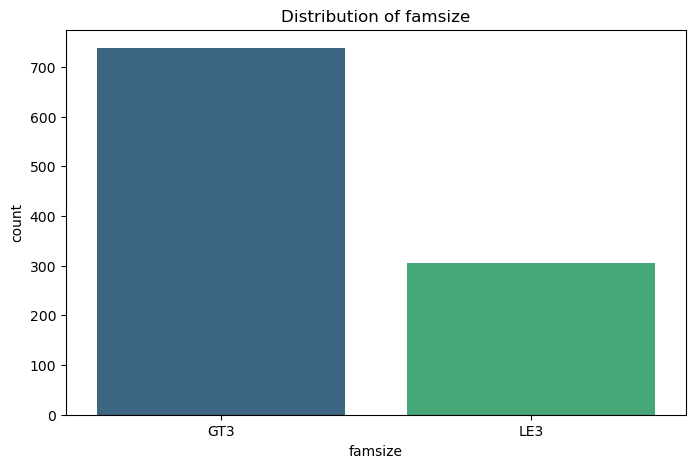

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


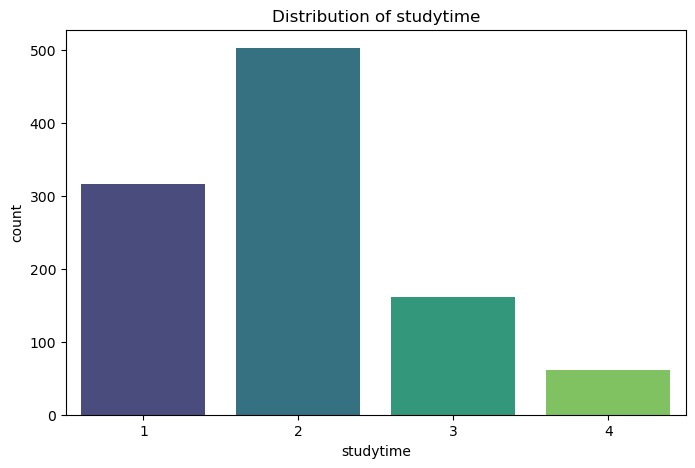

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\3602325607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df, palette="viridis")


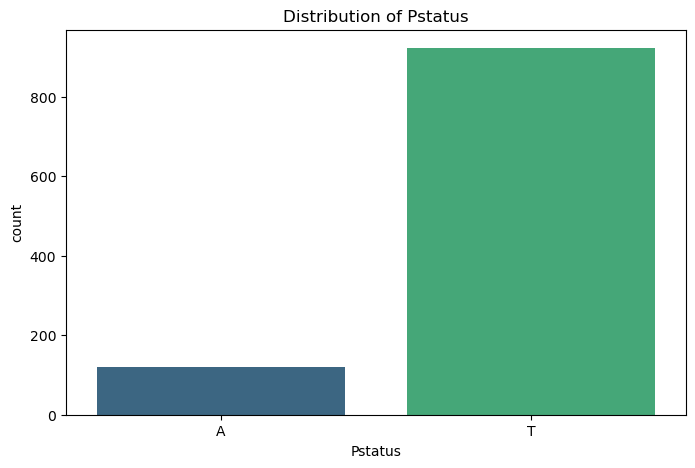

In [11]:
# Selecting variables of interest
selected_variables = ['school','sex', 'age', 'address', 'famsize', 'studytime', 'Pstatus']

# Plotting bar charts for each selected variable
for variable in selected_variables:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=variable, data=df, palette="viridis")
    plt.title(f'Distribution of {variable}')
    plt.show()


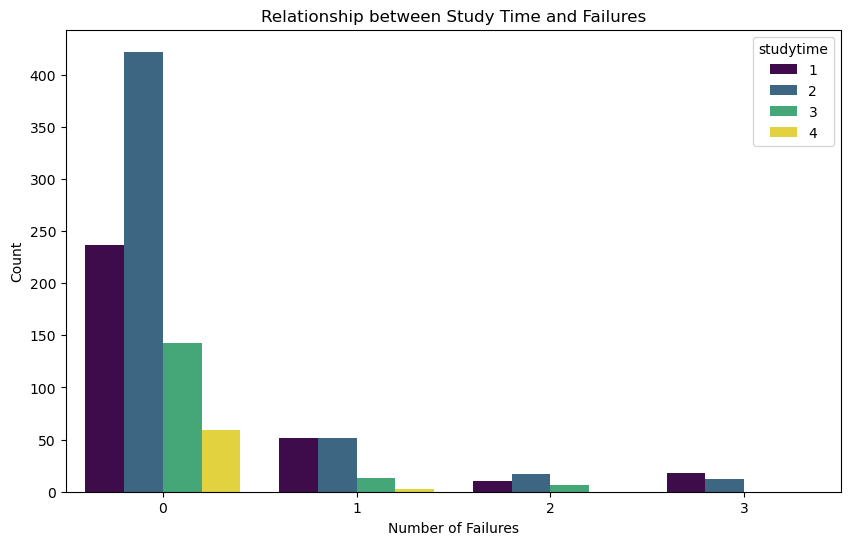

In [12]:
# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='failures', hue='studytime', data=df, palette='viridis')
plt.title('Relationship between Study Time and Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20092\2390465896.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['G3'] = df['G3']


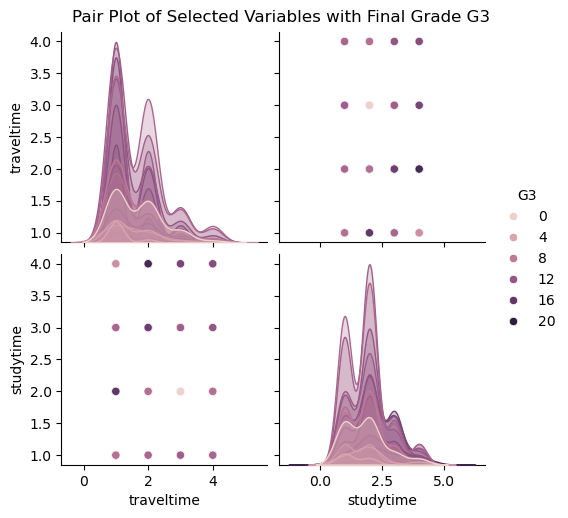

In [13]:
# Select the variables for the pair plot
selected_vars = ['traveltime', 'studytime']

# Subset the dataframe with selected variables
selected_df = df[selected_vars]

# Add 'G3' (final grade) to see its relationship with other variables
selected_df['G3'] = df['G3']

# Create a pair plot
sns.pairplot(selected_df, diag_kind='kde', hue='G3')

# Add a title to the pair plot
plt.suptitle('Pair Plot of Selected Variables with Final Grade G3', y=1.02)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14864\4265848445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['G3'] = df['G3']


<Figure size 640x480 with 0 Axes>

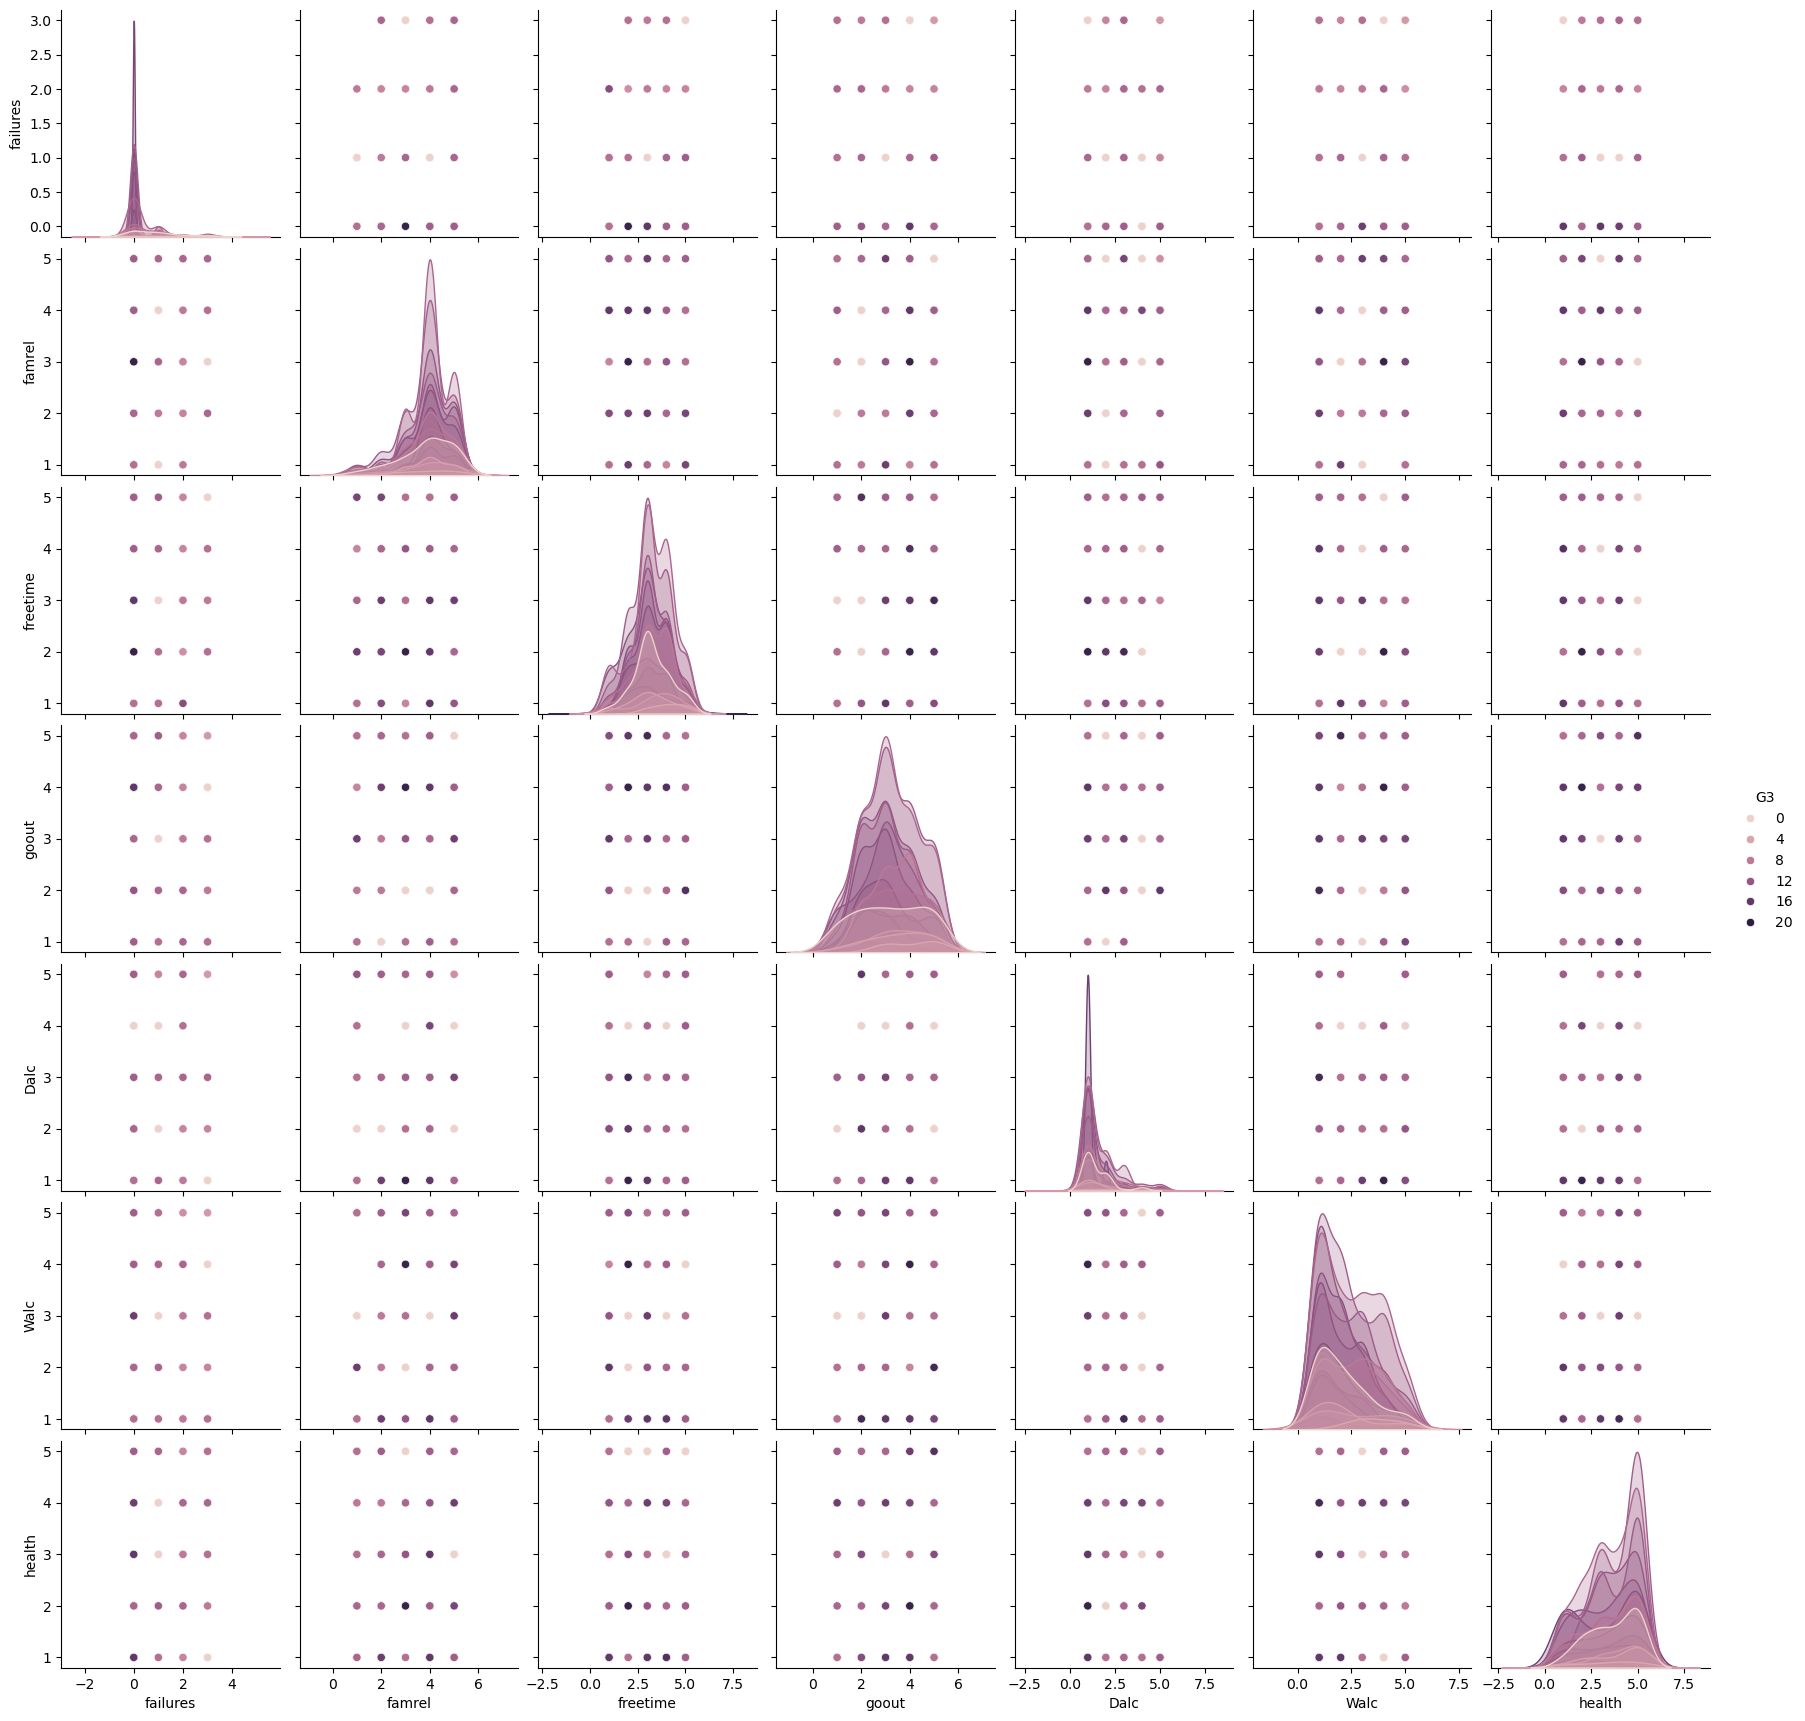

In [14]:
# Select numeric variables for pair plot
numeric_vars = ['failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

# Subset the dataframe with numeric variables
numeric_df = df[numeric_vars]

# Add 'G3' (final grade) to see its relationship with other variables
numeric_df['G3'] = df['G3']

# Add a title to the pair plot
plt.suptitle('Pair Plot of Selected Variables with Final Grade G3 in Mathematics', y=1.02)

# Create a pair plot
sns.pairplot(numeric_df, diag_kind='kde', hue='G3')
plt.show()

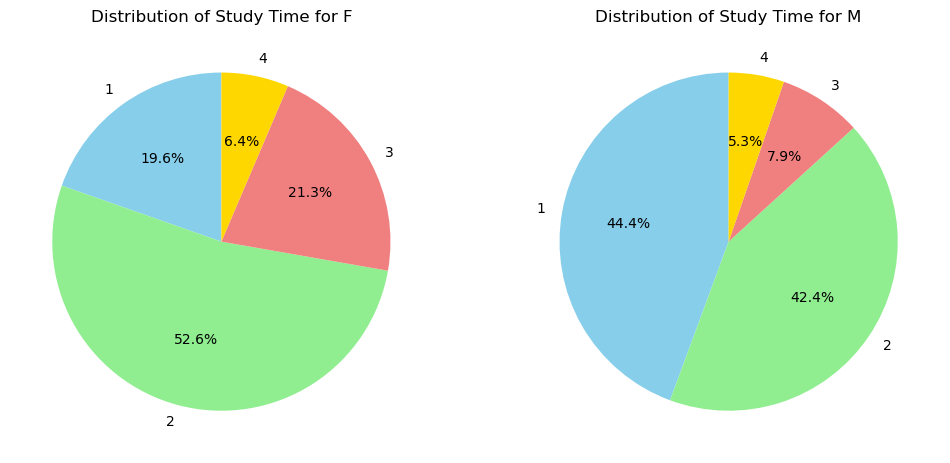

In [14]:
# Plotting the pie chart
gender_study_time = pd.crosstab(df['sex'], df['studytime'])

# Plotting pie charts for each gender category
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
labels = gender_study_time.columns

for i, (gender, data) in enumerate(gender_study_time.iterrows()):
    axes[i].pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'Distribution of Study Time for {gender}')

plt.show()

In [16]:
from factor_analyzer import FactorAnalyzer

# Choose the variables for Factor Analysis
variables = df.loc[:, df.dtypes==np.int64]

# Standardize the variables
scaled_vars = StandardScaler().fit_transform(variables)

# Create and fit the FactorAnalyzer 
factor_analyzer = FactorAnalyzer(n_factors=2, rotation='varimax')
factor_analyzer.fit(scaled_vars)

# Get factor loadings for Mathematics
factor_loadings = factor_analyzer.loadings_
print("Factor Loadings:")
print(factor_loadings)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Factor Loadings:
[[-0.16337216  0.15527335]
 [ 0.34918711  0.02115765]
 [ 0.31795906  0.04763028]
 [-0.16798803  0.08766835]
 [ 0.16988672 -0.24572269]
 [-0.42630756  0.17300291]
 [ 0.04122049 -0.04521852]
 [-0.02530832  0.24518326]
 [-0.01519692  0.45745317]
 [-0.02263886  0.68531608]
 [ 0.02198399  0.86395961]
 [-0.05422772  0.09542074]
 [-0.04773748  0.17594855]
 [ 0.85226701 -0.19319901]
 [ 0.92096215 -0.17887189]
 [ 0.87362522 -0.16467446]]


In [17]:
#EXTRACT DTYPES OF int64 Type: 
data = df.loc[:, df.dtypes==np.int64] 
data.head(6)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Best Parameters: {'n_estimators': 820, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Mean Squared Error: 2.679
R-squared: 0.827


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


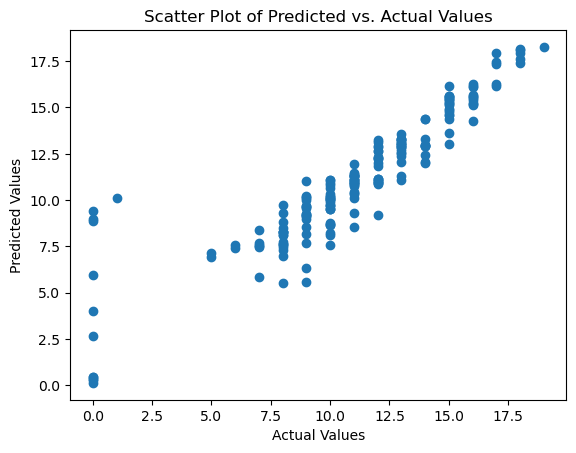

In [18]:
# Assume other features are stored in the 'features' DataFrame
features = data.drop(['G3'], axis=1)

# Features and target variables
y = df['G3']
X = features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in range(10, 1000, 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [int(x) for x in range(2, 20)],
    'min_samples_leaf': [int(x) for x in range(1, 20)],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model to the training data with hyperparameter tuning
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Retrieve the best model
best_rf = random_search.best_estimator_

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = round(mean_squared_error(y_test, y_pred),3)
print(f'Mean Squared Error: {mse}')

# Evaluate the model using R-squared
r2 = round(r2_score(y_test, y_pred),3)
print(f'R-squared: {r2}')

# Display scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()

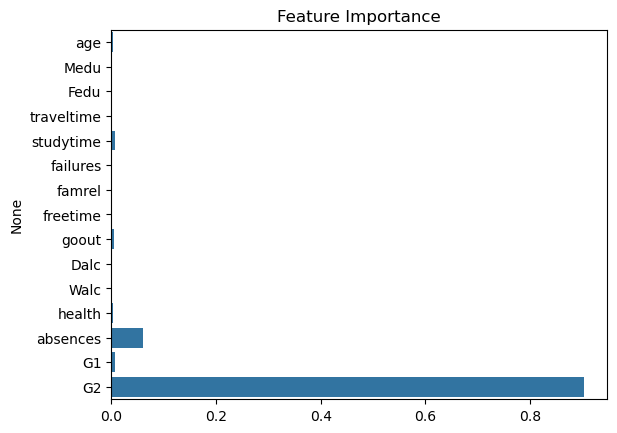

In [19]:
# Visualize feature importance
feature_importance = best_rf.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [20]:
# Define the thresholds for categorization
poor_threshold = 10
well_threshold = 15

# Create a new column 'achievement_category' based on final grades
df['achievement_category'] = pd.cut(df['G3'], bins=[0, poor_threshold, well_threshold, float('inf')],
                                    labels=['Poor Achieving', 'Average Achieving', 'Well Achieving'],
                                    right=False)

# Display the updated DataFrame
print(df[['G3', 'achievement_category']])

     G3 achievement_category
0     6       Poor Achieving
1     6       Poor Achieving
2    10    Average Achieving
3    15       Well Achieving
4    10    Average Achieving
..   ..                  ...
644  10    Average Achieving
645  16       Well Achieving
646   9       Poor Achieving
647  10    Average Achieving
648  11    Average Achieving

[1044 rows x 2 columns]


In [21]:
data.columns


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Best hyperparameters: {'n_estimators': 690, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 30, 'bootstrap': False}


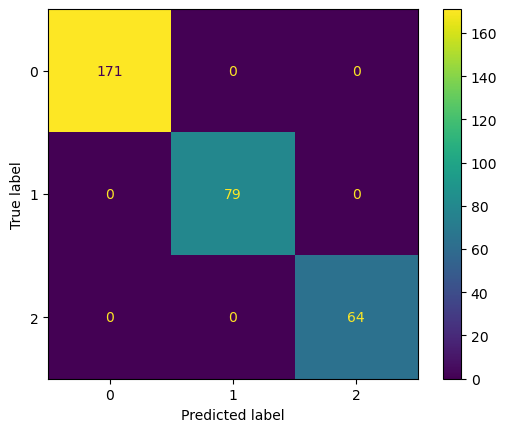

Accuracy: 1.0


In [22]:
# Define features (X) and target variable (y)
X = data
y = df['achievement_category']

# Splitting the data for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Call the relevant function
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Random Forest Classification model
rf_clf = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in range(10, 1000, 10)],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [int(x) for x in range(2, 20)],
    'min_samples_leaf': [int(x) for x in range(1, 20)],
    'bootstrap': [True, False]
}
rand_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=5, cv=5)

lab_enc = preprocessing.LabelEncoder()
encoded_ytrain = lab_enc.fit_transform(y_train)
rand_search.fit(X_train, encoded_ytrain)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Encode the testing labels
encoded_ytest = lab_enc.fit_transform(y_test)

# Create and display the confusion matrix
cm = confusion_matrix(encoded_ytest, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(encoded_ytest, y_pred)
print("Accuracy:", accuracy)

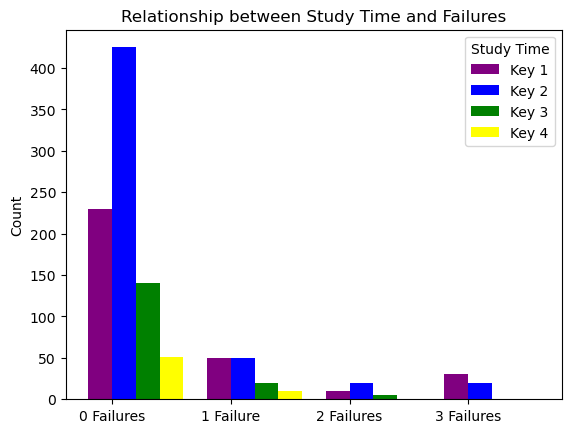

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['0 Failures', '1 Failure', '2 Failures', '3 Failures']
study_time_keys = ['Key 1', 'Key 2', 'Key 3', 'Key 4']
colors = ['purple', 'blue', 'green', 'yellow']
data = {
    'Key 1': [230, 50, 10, 30],
    'Key 2': [425, 50, 20, 20],
    'Key 3': [140, 20, 5, 0],
    'Key 4': [51, 10, 0, 0]
}

# Number of bars for each failure category
n_bars = len(data)

# Position of bars on x-axis
indices = np.arange(len(categories))

# Width of a bar 
width = 0.2

# Plotting
fig, ax = plt.subplots()

for i, (key, color) in enumerate(zip(study_time_keys, colors)):
    values = data[key]
    ax.bar(indices - width/2. + i*width, values, width=width, label=key, color=color)

# X-axis labels
ax.set_xticks(indices)
ax.set_xticklabels(categories)

# Y-axis label
ax.set_ylabel('Count')

# Chart title
ax.set_title('Relationship between Study Time and Failures')

# Legend
ax.legend(title='Study Time')

# Display the plot
plt.show()